<a href="https://colab.research.google.com/github/Shreyabaral/SocialMediaAnalytics/blob/main/youtube_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from googleapiclient.discovery import build
from google.colab import userdata

import concurrent.futures
from tqdm import tqdm

import time
from googleapiclient.errors import HttpError

import re

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
results_df = pd.read_json('/content/final_youtube_comments_data.json')

In [ ]:
data= pd.read_csv('vdoLinks.csv')

In [ ]:
data.shape

(25623, 3)

In [ ]:
data['youtubeId'].head()

,youtubeId
0,K26_sDKnvMU
1,3LPANjHlPxo
2,rEnOoWs3FuA
3,j9xml1CxgXI
4,ltwvKLnj1B4


In [ ]:
results_df.shape

(17973, 10)

In [ ]:
results_df.head()

,id,youtubeId,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,comments
0,0,K26_sDKnvMU,Trailer for Toy Story (1995) captured from the...,118333,153,0,0,PT1M31S,0,"[test, test, test]"
1,0,K26_sDKnvMU,Trailer for Toy Story (1995) captured from the...,118333,153,0,0,PT1M31S,0,"[test, test, test]"
2,1,3LPANjHlPxo,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,199331,286,0,0,PT2M48S,0,[]
3,2,rEnOoWs3FuA,"The more things change, the more they stay the...",224758,221,0,13,PT1M52S,0,"[Buena película de comedia romántica, <a href=..."
4,3,j9xml1CxgXI,Whitney Houston and Angela Bassett star in thi...,438325,0,0,0,PT2M40S,0,[]


In [ ]:
results_df.isnull().sum()

,0
id,0
youtubeId,0
description,0
view_count,0
like_count,0
dislike_count,0
comment_count,0
duration,0
favorite_count,0
comments,0


In [ ]:
#merge data with scraped data
results_df = data.merge(results_df, on='youtubeId', how='inner')


In [ ]:
results_df.head()

,youtubeId,movieId,title,id,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,comments
0,K26_sDKnvMU,1,Toy Story (1995),0,Trailer for Toy Story (1995) captured from the...,118333,153,0,0,PT1M31S,0,"[test, test, test]"
1,K26_sDKnvMU,1,Toy Story (1995),0,Trailer for Toy Story (1995) captured from the...,118333,153,0,0,PT1M31S,0,"[test, test, test]"
2,3LPANjHlPxo,2,Jumanji (1995),1,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,199331,286,0,0,PT2M48S,0,[]
3,rEnOoWs3FuA,3,Grumpier Old Men (1995),2,"The more things change, the more they stay the...",224758,221,0,13,PT1M52S,0,"[Buena película de comedia romántica, <a href=..."
4,j9xml1CxgXI,4,Waiting to Exhale (1995),3,Whitney Houston and Angela Bassett star in thi...,438325,0,0,0,PT2M40S,0,[]


In [ ]:
results_df.shape

(18033, 12)

In [ ]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18033 entries, 0 to 18032
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   youtubeId       18033 non-null  object
 1   movieId         18033 non-null  int64 
 2   title           18033 non-null  object
 3   id              18033 non-null  int64 
 4   description     18033 non-null  object
 5   view_count      18033 non-null  int64 
 6   like_count      18033 non-null  int64 
 7   dislike_count   18033 non-null  int64 
 8   comment_count   18033 non-null  int64 
 9   duration        18033 non-null  object
 10  favorite_count  18033 non-null  int64 
 11  comments        18033 non-null  object
dtypes: int64(7), object(5)
memory usage: 1.7+ MB


In [ ]:
results_df.isnull().sum()

,0
youtubeId,0
movieId,0
title,0
id,0
description,0
view_count,0
like_count,0
dislike_count,0
comment_count,0
duration,0


In [ ]:
# Convert the 'view_count' column to int
results_df['view_count'] = pd.to_numeric(results_df['view_count'], errors='coerce')
results_df['like_count'] = pd.to_numeric(results_df['like_count'], errors='coerce')

In [ ]:
#A list of top 10 videos based on the total views
results_df.sort_values(by='view_count', ascending=False)[:10]

,youtubeId,movieId,title,id,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,comments
15605,450p7goxZqg,111226,All of Me (2013),16001,Official music video for “All of Me” by John L...,2427688371,13352452,0,259462,PT5M8S,0,"[I love this song, God given talent., this is ..."
16995,dNJdJIwCF_Y,120853,Fresh Guacamole (2012),17429,The 2013 Academy Award Nominated film by PES. ...,480695161,2932599,0,74532,PT1M41S,0,"[When mom says we have food at home:, nostalgi..."
17423,z5rRZdiu1UE,126106,Beastie Boys: Sabotage (1994),17869,Official music video for “Sabotage.” REMASTERE...,133920054,854219,0,32409,PT3M4S,0,[These guys were practicing Parkour before it ...
3977,j-V12tL78Mc,5364,Unfaithful (2002),4068,Unfaithful movie clips: http://j.mp/1ixkUnl\nB...,127898896,72640,0,3958,PT2M43S,0,"[بموت لم الظبر يتخل في الاكس🔥, What did she se..."
14429,NVcSNnqRD0c,104076,"Smurfs 2, The (2013)",14795,Britney Spears' official music video for 'Ooh ...,125140626,812249,0,59215,PT4M21S,0,"[I remember i watched this before 2015, t&#39;..."
16178,ISovsVvX8Bg,114933,Ilo Ilo (2013),16587,Trailer for ILO ILO 爸媽不在家\n\nOfficial Website:...,91685421,80375,0,0,PT1M49S,0,[]
10605,SvGcGjIc16I,76189,Growth (2009),10867,"Here is the trailer for Growth, the latest fil...",73474302,36183,0,29,PT2M6S,0,"[is it like Slither?, eww gross...but interes..."
11992,3H8bnKdf654,87520,Transformers: Dark of the Moon (2011),12289,Subscribe! http://YouTube.com/ClevverTV\n\nWat...,53112347,108258,0,22150,PT2M28S,0,[Fun fact: Sentinel&#39;s facial features were...
17914,bQRLVxZHKPs,130075,Frozen Fever (2015),18373,"On March 13, it's the perfect day for a new Fr...",51263274,107974,0,0,PT40S,0,[]
17366,sdUUx5FdySs,125926,Kiwi! (2006),17810,"My Master's Thesis Animation, which I complete...",49110015,676988,0,76749,PT3M10S,0,[18 years later and this still makes me cry.. ...


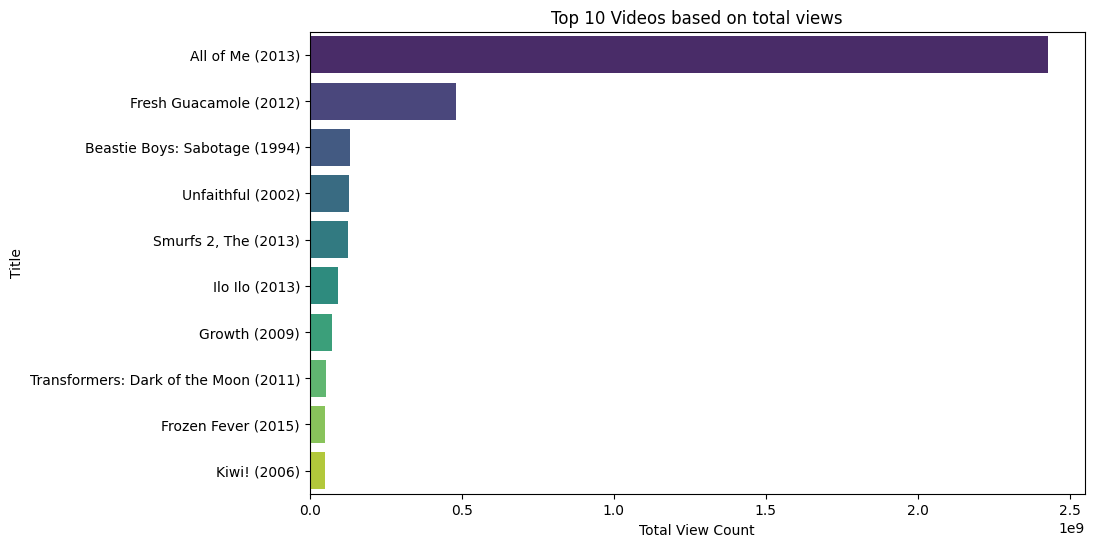

In [ ]:
#bar diagram of top 10 videos based on total views
plt.figure(figsize=(10, 6))
sns.barplot(x='view_count', y='title', data=results_df.sort_values(by='view_count', ascending=False)[:10], palette='viridis')
plt.title('Top 10 Videos based on total views')
plt.xlabel('Total View Count')
plt.ylabel('Title')
plt.show()

In [ ]:
#A list of bottom 10 videos based on the total views

# Filter the DataFrame for view_count greater than 0
filtered_df = results_df[results_df['view_count'] > 0]

# Sort the filtered DataFrame by view_count in ascending order and get the bottom 10
bottom_10_videos = filtered_df.sort_values(by='view_count', ascending=True).head(10)
bottom_10_videos.head(10)

,youtubeId,movieId,title,id,description,view_count,like_count,dislike_count,comment_count,duration,favorite_count,comments
14182,HX7dx_w_Ol8,102860,Hilton! (2013),14543,,17,0,0,0,PT18S,0,[]
17864,sYpW4fvlf7s,129777,Chronic Town (2010),18322,Reclusive indie pioneers The Long Afternoon pe...,45,1,0,0,PT3M34S,0,[]
16478,hHJow-uF3A0,116945,Freedom (2009),16897,Cabrainnnnnnnn,46,0,0,0,PT1M1S,0,[]
15022,CA2QbzFUoQQ,107621,"Wooden Bridge, The (2012)",15403,Cornerstone Wooden Bridge,46,0,0,0,PT58S,0,[]
15483,9B-65BWKwQM,110314,"Me Two (Personne aux deux personnes, La) (2008)",15875,warheads they are sour,52,0,0,0,PT56S,0,[]
16909,tQplNZJL8XI,120208,Flesh and Blood (1922),17340,Directed by Irving Cummings\nStarring:\nLon Ch...,101,0,0,0,PT1H13M19S,0,[]
14399,248-_S_5fAw,103910,Rafa (2012),14765,,108,2,0,0,PT6M10S,0,[]
15240,Yab8jYZIrhY,108977,Paranoia Agent (2004),15628,Twitter: https://twitter.com/justcallmeques\n\...,117,0,0,0,PT3M6S,0,[]
15142,zrhl2wZrvgI,108316,American Scary (2006),15527,American Scary,119,0,0,0,PT2M40S,0,[]
13513,D4MYlz7vaRg,98337,97 Percent True (2008),13855,2008 Guy Maddin,149,2,0,0,PT6M30S,0,[]


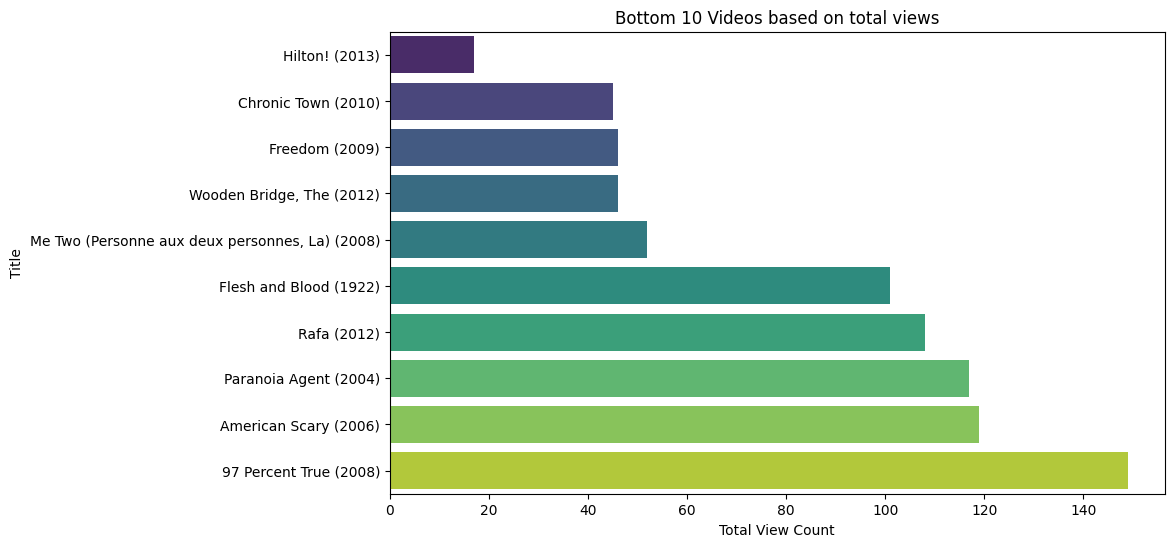

In [ ]:
#bar diagram of bottom 10 videos based on total views
plt.figure(figsize=(10, 6))
sns.barplot(x='view_count', y='title', data=bottom_10_videos, palette='viridis')
plt.title('Bottom 10 Videos based on total views')
plt.xlabel('Total View Count')
plt.ylabel('Title')
plt.show()

In [ ]:
#the most liked video
results_df.sort_values(by='like_count', ascending=False).head(1)['title']

,title
15605,All of Me (2013)


In [ ]:
#the least liked video
results_df.sort_values(by='like_count', ascending=False).tail(1)['title']

,title
3846,Royal Wedding (1951)


In [ ]:
# Function to convert ISO 8601 duration to total minutes
def convert_duration(duration):
    # Match minutes and seconds using regex
    minutes = int(re.search(r'(\d+)M', duration).group(1)) if 'M' in duration else 0
    seconds = int(re.search(r'(\d+)S', duration).group(1)) if 'S' in duration else 0
    total_minutes = minutes + seconds / 60
    return total_minutes

#Apply the conversion function
results_df['duration'] = results_df['duration'].apply(convert_duration)



In [ ]:
#the video with highest duration
results_df.sort_values(by='duration', ascending=False).head(1)['title']

,title
9512,Dr. Jack (1922)


In [ ]:
%nltk.download('vader_lexicon')

UsageError: Line magic function `%nltk.download('vader_lexicon')` not found.


In [ ]:
#Sentiment Analysis using Vader
sid = SentimentIntensityAnalyzer()

def calculate_average_compound_score(texts):
    """
    Calculate the average compound sentiment score for a list of texts using VADER.

    Parameters:
        texts (list of str): A list of text strings to analyze.

    Returns:
        float: The average compound sentiment score for the list of texts.
    """
    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    compound_scores = []

    if not texts or len(texts)==0:

        return np.nan
      # Return NaN if the text is empty or None
    else:

      for text in texts:
          sentiment = sia.polarity_scores(text)
          compound_scores.append(sentiment['compound'])  # Append the compound score

    # Calculate the average compound score
    average_compound_score = sum(compound_scores) / len(compound_scores) if compound_scores else 0.0

    return average_compound_score

# Example usage:
average_score = calculate_average_compound_score(results_df['comments'][1])

print(f"Average Compound Score: {average_score}")


results_df['average_compound_score'] = results_df['comments'].apply(calculate_average_compound_score)

Average Compound Score: 0.0


In [ ]:
results_df['average_compound_score'].isna().sum() #count of null values

2605

In [ ]:
def categorize_sentiment(compound_score):
    """
    Categorize the sentiment based on the compound score.

    Parameters:
        compound_score (float): The compound sentiment score.

    Returns:
        str: 'pos' for positive, 'neg' for negative, 'neu' for neutral.
    """
    if pd.isna(compound_score):
        return np.nan  # Return NaN if compound_score is NaN
    elif compound_score > 0.05:
        return 'pos'
    elif compound_score < -0.05:
        return 'neg'
    else:
        return 'neu'


results_df['sentiment'] = results_df['average_compound_score'].apply(categorize_sentiment)

In [ ]:
results_df[results_df['sentiment']=='pos'].shape #count of positive comments

(11925, 14)

In [ ]:
results_df[results_df['sentiment']=='neg'].shape #count of negative comments

(1169, 14)

In [ ]:
results_df[results_df['sentiment']=='neu'].shape #count of neutral comments

(2334, 14)

In [ ]:
#data with highest positive sentiment scores
highest_pos_score_df= results_df[results_df['sentiment']=='pos'].sort_values(by='average_compound_score', ascending=False).head(10).reset_index(drop=True)

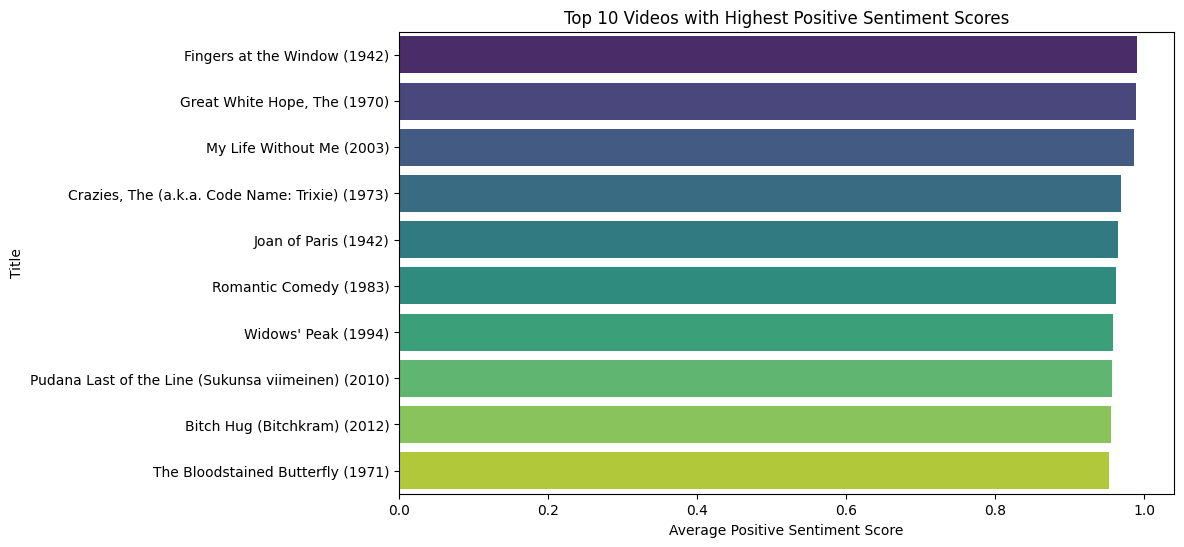

In [ ]:
#bar diagram
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='average_compound_score', y='title', data=highest_pos_score_df, hue='title', palette='viridis', legend=False)
plt.title('Top 10 Videos with Highest Positive Sentiment Scores')
plt.xlabel('Average Positive Sentiment Score')
plt.ylabel('Title')
plt.show()